In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Сначала приведем данные для реализации на $pthreads$. Исследуем зависимость от числа тредов $P = \{1, 2, 4, 8, 16\}$.Тестирование будет происходить при $n = 10^{7}$ и $m = 10^{5}$.

Таким образом, параметры запуска есть:
$$./run\ 10000000\ 100000\ P$$

In [2]:
T_1 = np.array([8.6446, 8.2712, 7.9881, 8.2693, 8.2744,
                8.8942, 8.477, 8.2789, 8.1062, 8.2942])
T_2 = np.array([4.5582, 4.4788, 4.5887, 4.5285, 4.4235,
                4.5578, 4.4361, 4.37, 4.4027, 4.7516])
T_3 = np.array([2.4032, 2.3976, 2.3975, 2.4811, 2.5636,
                2.3248, 2.4021, 2.4248, 2.3776, 2.407])
T_4 = np.array([1.6246, 1.55, 1.6371, 1.5955, 1.5707,
                1.5922, 1.6278, 1.6196, 1.6499, 1.5465])
T_5 = np.array([1.323, 1.362, 1.3086, 1.3332, 1.2622,
                1.2944, 1.33, 1.3901, 1.2247, 1.2805])

t_1 = np.mean(T_1)
t_2 = np.mean(T_2)
t_3 = np.mean(T_3)
t_4 = np.mean(T_4)
t_5 = np.mean(T_5)

Теперь сделаем то же самое для реализации на $openMP$.

In [3]:
L_1 = np.array([2.9229, 2.9279, 3.025, 2.7121, 2.7175,
                2.7108, 2.725, 2.7171, 2.7319, 3.2368])
L_2 = np.array([1.4162, 1.5057, 1.453, 1.5286, 1.3906,
                1.3961, 1.4585, 1.4655, 1.6565, 1.4621])
L_3 = np.array([1.5875, 1.5323, 1.6641, 1.5174, 1.5335,
                1.6469, 1.5035, 1.3989, 1.534, 1.5714])
L_4 = np.array([1.6006, 1.5889, 1.5448, 1.5466, 1.6484,
                1.5555, 1.6225, 1.6404, 1.5401, 1.5376])
L_5 = np.array([1.4937, 1.4099, 1.6203, 1.5314, 1.4088,
                1.4126, 1.5226, 1.5848, 1.6156, 1.6246])

l_1 = np.mean(L_1)
l_2 = np.mean(L_2)
l_3 = np.mean(L_3)
l_4 = np.mean(L_4)
l_5 = np.mean(L_5)

Для того чтобы измерить $T_{1}$ - используем $sequential.c$

Параметры запуска:
$$./special\ 10000000$$

In [4]:
T = np.array([2.4105, 2.4024, 2.6107, 2.3791, 2.3834,
              2.3812, 2.6141, 2.3733, 2.3717, 2.4258])

t = np.mean(T)

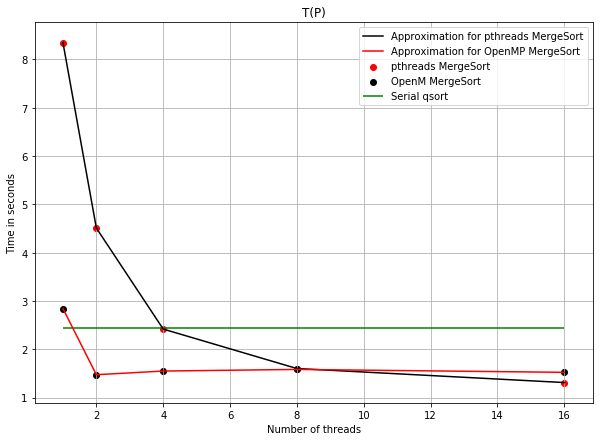

In [6]:
x = np.array([1, 2, 4, 8, 16])
y = np.array([t_1, t_2, t_3, t_4, t_5])
z = np.array([l_1, l_2, l_3, l_4, l_5])

plt.figure(figsize=(10,7))

plt.plot(x, y, "black", label='Approximation for pthreads MergeSort')
plt.scatter(x, y, c='red', label='pthreads MergeSort')
plt.plot(x, z, "red", label='Approximation for OpenMP MergeSort')
plt.scatter(x, z, c='black', label='OpenM MergeSort')
plt.hlines(t, 1, 16, color='green', label='Serial qsort')

plt.xlabel("Number of threads")
plt.ylabel("Time in seconds")

plt.title("T(P)")
plt.grid()
plt.legend()
plt.show()

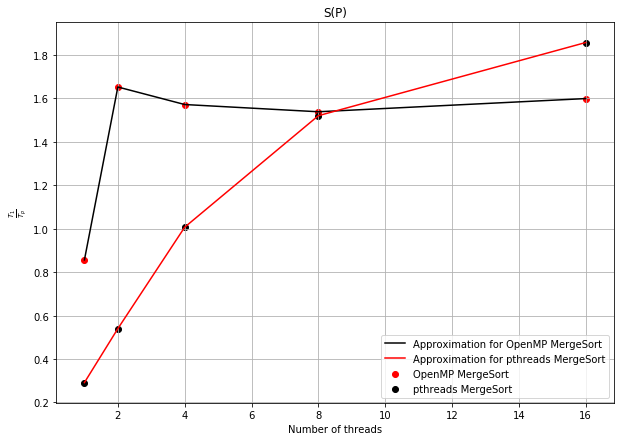

In [9]:
x = np.array([1, 2, 4, 8, 16])
y = np.array([t_1, t_2, t_3, t_4, t_5])
z = np.array([l_1, l_2, l_3, l_4, l_5])

plt.figure(figsize=(10,7))

plt.plot(x, t / z, "black", label='Approximation for OpenMP MergeSort')
plt.scatter(x, t / z, c='red', label='OpenMP MergeSort')
plt.plot(x, t / y, "red", label='Approximation for pthreads MergeSort')
plt.scatter(x, t / y, c='black', label='pthreads MergeSort')

plt.xlabel("Number of threads")
plt.ylabel(r"$\frac{T_1}{T_p}$")

plt.title("S(P)")
plt.grid()
plt.legend()
plt.show()

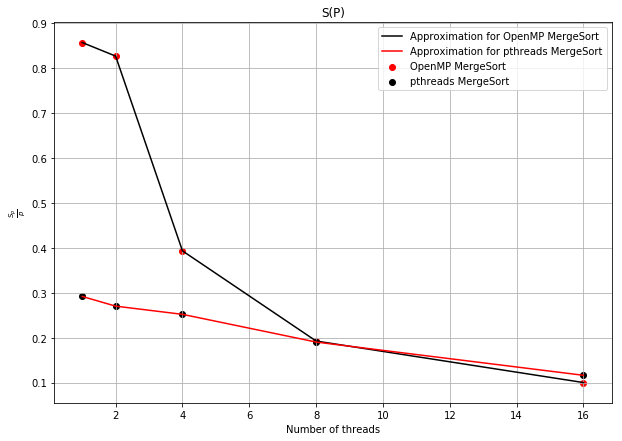

In [10]:
x = np.array([1, 2, 4, 8, 16])
y = np.array([t_1, t_2, t_3, t_4, t_5])
z = np.array([l_1, l_2, l_3, l_4, l_5])

plt.figure(figsize=(10,7))

plt.plot(x, t / (x*z), "black", label='Approximation for OpenMP MergeSort')
plt.scatter(x, t / (x*z), c='red', label='OpenMP MergeSort')
plt.plot(x, t / (x*y), "red", label='Approximation for pthreads MergeSort')
plt.scatter(x, t / (x*y), c='black', label='pthreads MergeSort')

plt.xlabel("Number of threads")
plt.ylabel(r"$\frac{S_p}{p}$")

plt.title("S(P)")
plt.grid()
plt.legend()
plt.show()